In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from coreforecast.scalers import boxcox, boxcox_lambda
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(f'../DATA/aus_retail.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [37]:
np.random.seed(84564)
random_series_id = np.random.choice(df['Series ID'].unique(), 1)[0]
surprise = df[df['Series ID'] == random_series_id]
surprise['Month_2'] = surprise['Month']
surprise = surprise.set_index('Month')

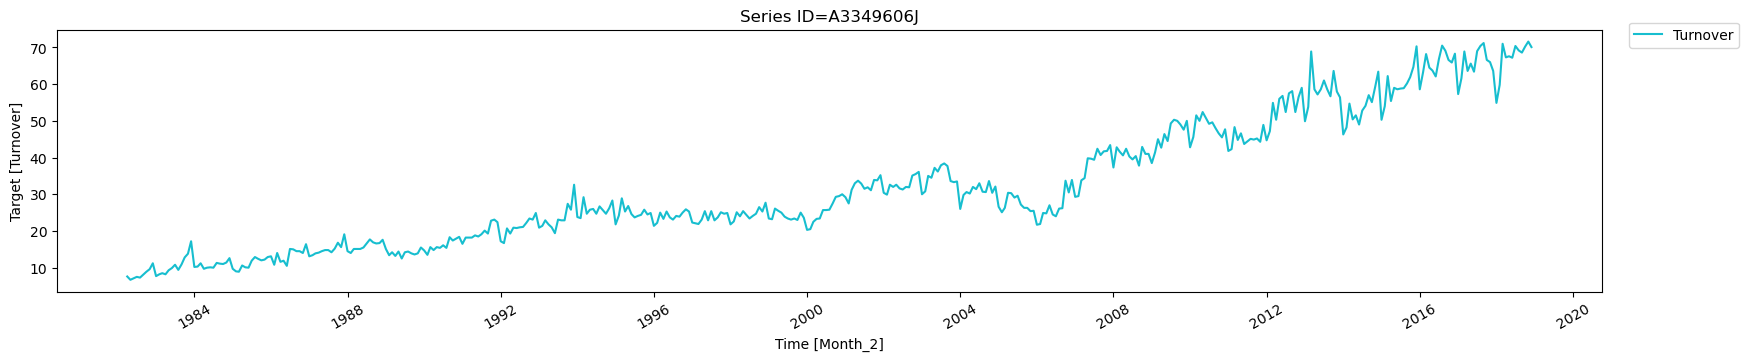

In [38]:
plot_series(surprise, id_col='Series ID',  time_col= 'Month_2', target_col='Turnover' ,plot_random=False, engine='matplotlib')

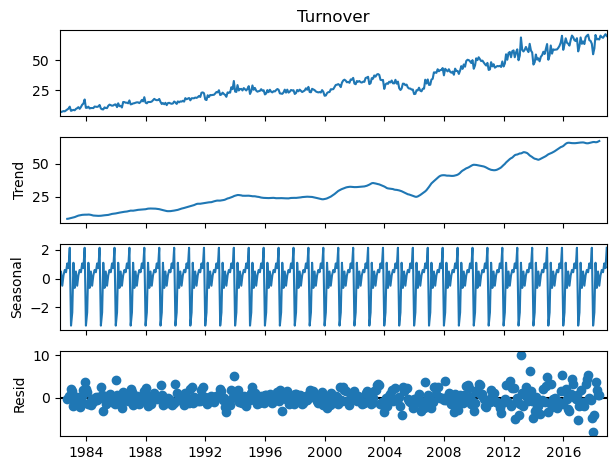

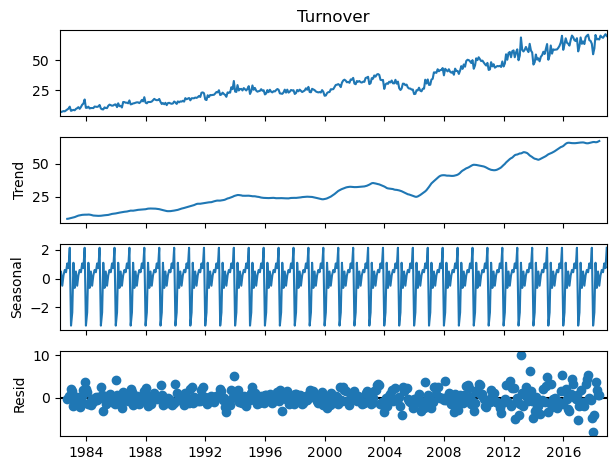

In [39]:
seasonal_decompose(surprise['Turnover']).plot()

<Axes: xlabel='Month', ylabel='seasonal'>

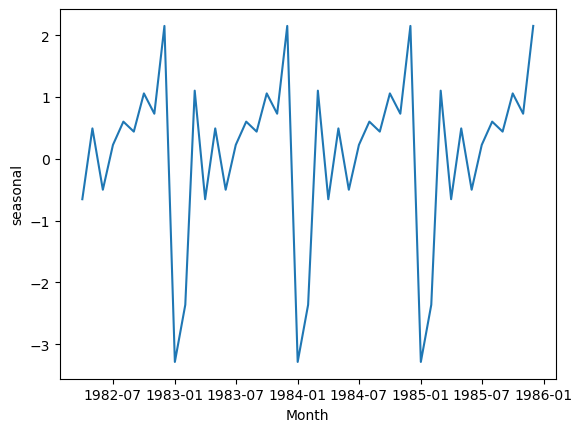

In [40]:
test = seasonal_decompose(surprise['Turnover'], period=12).seasonal
test = test[test.index.year <= 1985]
sns.lineplot(test)


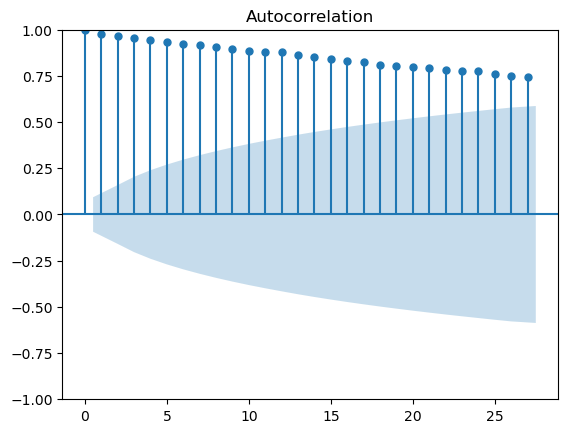

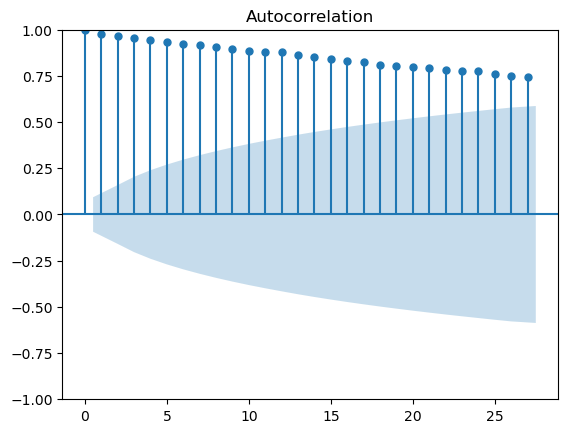

In [10]:
plot_acf(surprise['Turnover'])

<Axes: >

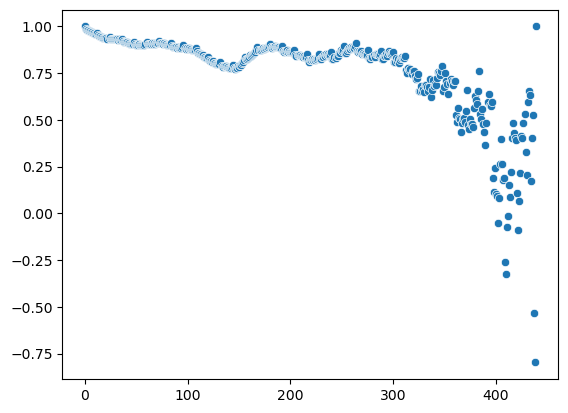

In [41]:
autocor = []
for i in range(1000):
    res = surprise['Turnover'].autocorr(lag=i) 
    autocor.append(res)
sns.scatterplot(autocor)

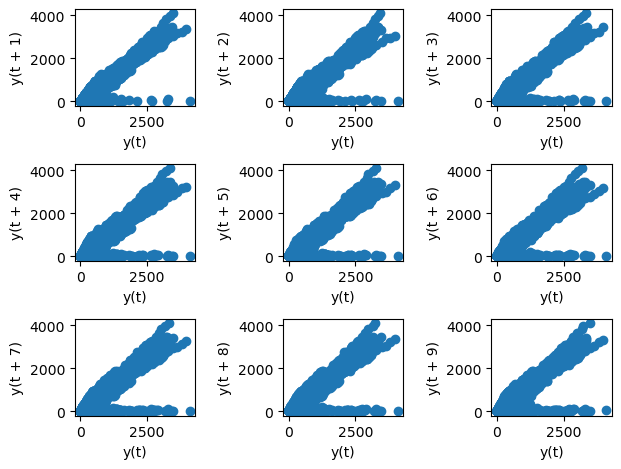

In [42]:
fig, axes = plt.subplots(3,3)
for i, ax in zip(range(1,10), axes.flatten()):
    pd.plotting.lag_plot(df['Turnover'], lag=i, ax=ax)
plt.tight_layout()

<Axes: xlabel='Month_2'>

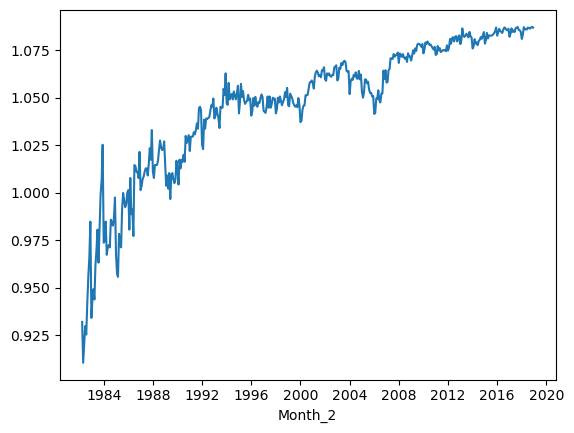

In [46]:
# Let's check a log/boxcox transform 

df.head()
optim_lambda = boxcox_lambda(surprise["Turnover"].to_numpy(), method="guerrero", season_length=12)
y_transformed = boxcox(surprise["Turnover"].to_numpy(), optim_lambda)
sns.lineplot(surprise, x='Month_2', y=y_transformed)

<Axes: xlabel='Month_2', ylabel='Turnover'>

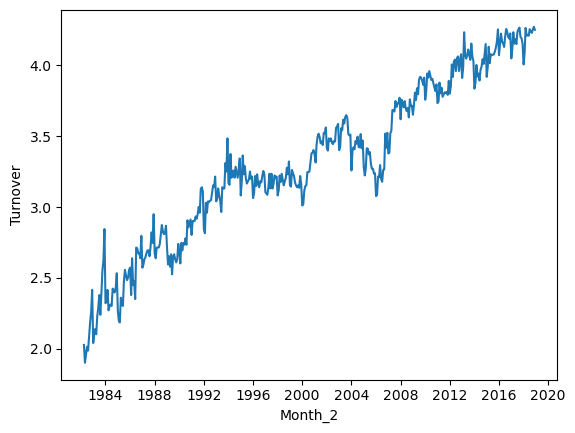

In [48]:
# Let's check a log/boxcox transform 


y_transformed = np.log(surprise["Turnover"])
sns.lineplot(surprise, x='Month_2', y=y_transformed)

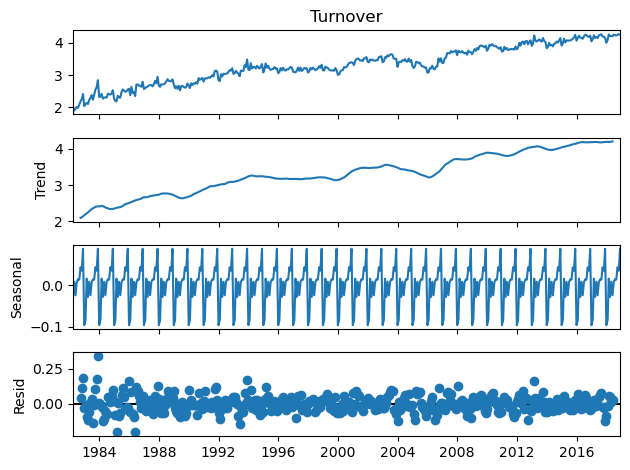

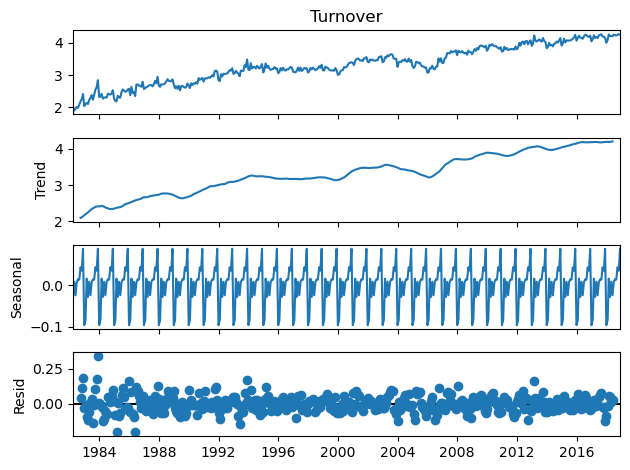

In [49]:
seasonal_decompose(y_transformed).plot()